In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
plt.rcParams['figure.figsize'] = [12, 12]

First we compute $\mathbb P(H_0|X=x)$. This is equal to
$$\frac{f(x|0)}{f(x|0)+\int f(x|\mu)f(\mu)d\mu}$$
where $f$ denotes both the prior distribution for $\mu$ and the distribution for $X$. We have $f(x|0)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$. On the other hand,
$$\int f(x|\mu)f(\mu)d\mu = \int \frac{1}{2\pi b}e^{-(b^2(x-\mu)^2 + \mu^2)/2b^2}d\mu=\frac{1}{2\pi b}\int e^{-((b^2+1)\mu^2-2b^2x\mu+b^2x^2)/2b^2}d\mu.$$
Completing the square, this is equal to
$$\frac{1}{2\pi b}\int e^{-\frac{b^2+1}{2b^2}\left(\left(\mu - \frac{b^2}{b^2+1}x\right)^2+\frac{b^2}{(b^2+1)^2}x^2\right)}d\mu
=\frac{e^{-x^2/2(b^2+1)}}{2\pi b}\int e^{-\frac{b^2+1}{2b^2}\left(\mu - \frac{b^2}{b^2+1}x\right)^2}d\mu$$
which is finally equal to
$$\frac{e^{-x^2/2(b^2+1)}}{2\pi b}\frac{\sqrt{2\pi}b}{\sqrt{b^2+1}}=\frac{e^{-x^2/2(b^2+1)}}{\sqrt{2\pi(b^2+1)}}.$$
Plugging this into our expression for $\mathbb P(H_0|X=x)$ yields
$$\mathbb P(H_0|X=x)=\frac{e^{-x^2/2}}{e^{-x^2/2}+\frac{e^{-x^2/2(b^2+1)}}{\sqrt{b^2+1}}}=\frac{\sqrt{b^2+1}}{\sqrt{b^2+1}+e^{b^2x^2/2(b^2+1)}}.$$

In the Wald test, we estimate $\mu$ by $X$ and we reject $H_0$ if $|X/\hat{\text{se}}|$ is sufficiently large, where $\hat{\text{se}}$ is some estimate of the standard error of $X$. However, the standard error is simply equal to 1. Hence we reject the null hypothesis when $|X|$ is sufficiently large. By Theorem 10.13, the p-value when $X=x$ is then $2\Phi(-|x|)$.

Let's plot the p-value of the Wald test versus the posterior probability of $H_0$.

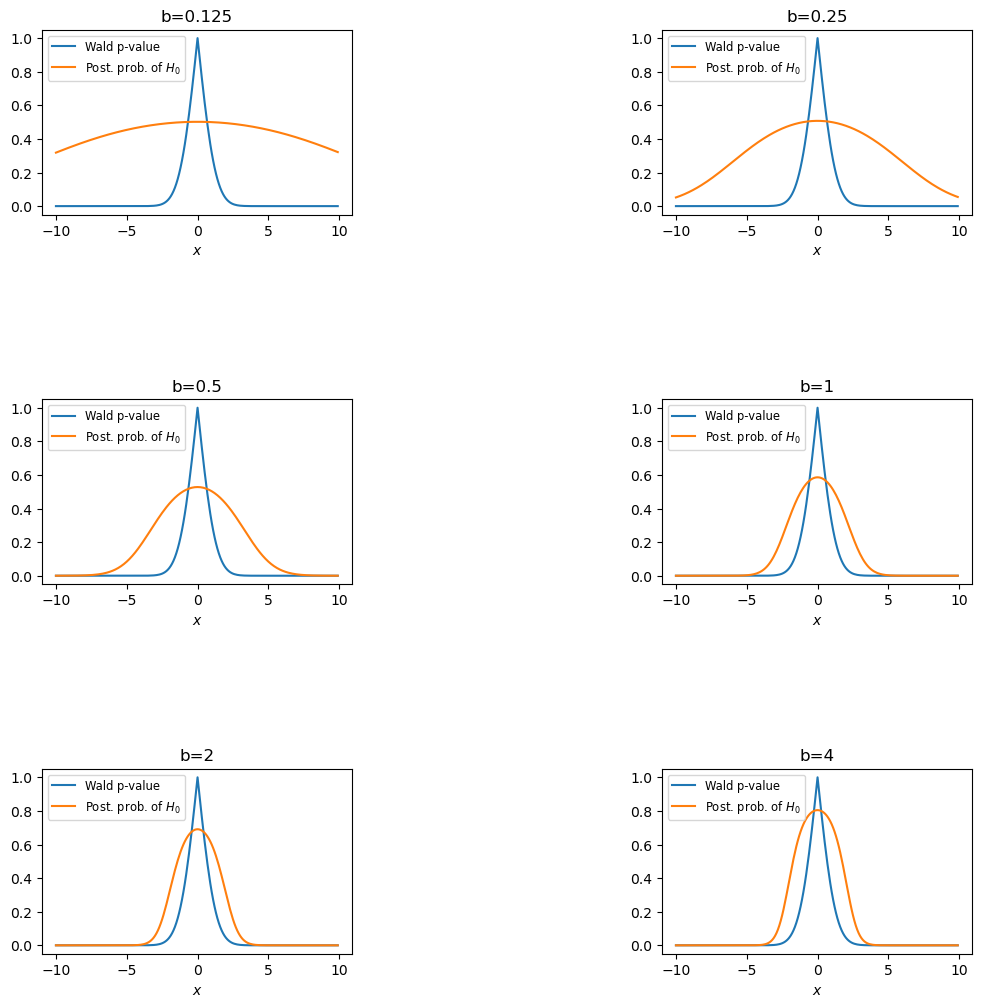

In [3]:
x = np.arange(-10, 10, 0.1)
fig, axs = plt.subplots(3,2)
plt.subplots_adjust(hspace=1, wspace=1)

for i, b in enumerate([0.125,0.25,0.5,1,2,4]):
    post_prob = np.sqrt(b**2 + 1) / (np.sqrt(b**2 + 1) + np.exp(b**2 * x**2 / (2 * (b**2 + 1))))
    wald_prob = 2*norm.cdf(-np.abs(x))
    ax = axs[i // 2][i % 2]
    ax.set_title(fr'b={b}')
    ax.set_xlabel(r'$x$')
    ax.plot(x, wald_prob, label=r'Wald p-value')
    ax.plot(x, post_prob, label=r'Post. prob. of $H_0$')
    ax.legend(loc='upper left', fontsize='small')

In the case that $X^n=x^n$ is a sample, $f(x^n|0)$ becomes $(2\pi)^{-n/2}e^{-\sum x_i^2/2}$. Also, $\int f(x^n|\mu)f(\mu)d\mu$ becomes
$$\frac{1}{(2\pi)^{(n+1)/2}b}\int \exp\left(-(b^2\sum (x_i-\mu)^2 + \mu^2)/2b^2\right)d\mu = 
\frac{1}{(2\pi)^{(n+1)/2}b} \int \exp\left(\left(-(b^2n+1)\mu^2 +2b^2n\bar x \mu - b^2\sum x_i^2\right)/2b^2\right)d\mu.$$
Completing the square yields
$$\frac{1}{(2\pi)^{(n+1)/2}b} \exp\left(-\frac{1}{2}\sum x_i^2 + \frac{b^2n^2\bar x^2}{2(b^2n+1)}\right)
\int \exp\left(-\frac{b^2n+1}{2b^2}\left(\mu - \frac{b^2n}{b^2n+1}\bar x\right)^2\right)d\mu = \frac{1}{(2\pi)^{n/2}\sqrt{b^2n+1}}\exp\left(-\frac{1}{2}\sum x_i^2 + \frac{b^2n^2\bar x^2}{2(b^2n+1)}\right).$$
Thus,
$$\mathbb P(H_0|X=x)=\frac{1}{1+(b^2n+1)^{-1/2}\exp\left(\frac{b^2n^2\bar x^2}{2(b^2n+1)}\right)}
=\frac{\sqrt{b^2n+1}}{\sqrt{b^2n+1} + \exp\left(\frac{b^2n^2\bar x^2}{2(b^2n+1)}\right)}.$$

In the Wald test, we estimate $\mu$ by $\bar X$ and we reject $H_0$ if $|\bar X/\hat{\text{se}}|$ is sufficiently large, where $\hat{\text{se}}$ is some estimate of the standard error of $\bar X$. However, the standard error is simply equal to $1/n$. Hence we reject the null hypothesis when $n|\bar X|$ is sufficiently large. By Theorem 10.13, the p-value when $X^n=x^n$ is then $2\Phi(-n|\bar x|)$.

Let's experiment with sampling with different values of $b$ and $n$ and comparing the Wald p-value and the posterior probability of $H_0$.

In [6]:
for b in [0.03125,0.0625,0.125,0.25,0.5,1]:
    for n in [1,10,100,1000,int(1e5),int(1e6)]:
        mu = norm.rvs(loc=0, scale=b, size=1)
        X = norm.rvs(loc=mu, scale=1, size=n)
        Xbar = X.mean()
        p_val = 2 * norm.cdf(-n * np.abs(Xbar))
        post_prob = np.sqrt(b**2 * n + 1) / (np.sqrt(b**2 * n + 1) + np.exp(b**2 * n**2 * Xbar**2
                                                                            / (2 * (b**2 * n + 1))))
        print(f'b: {b}')
        print(f'n: {n}')
        print(f'Wald test p-value: {p_val:.8f}')
        print(f'Posterior probability of the null hypothesis: {post_prob:.8f}\n')

b: 0.03125
n: 1
Wald test p-value: 0.68998717
Posterior probability of the null hypothesis: 0.50010261

b: 0.03125
n: 10
Wald test p-value: 0.18555527
Posterior probability of the null hypothesis: 0.50100291

b: 0.03125
n: 100
Wald test p-value: 0.00000000
Posterior probability of the null hypothesis: 0.50271081

b: 0.03125
n: 1000
Wald test p-value: 0.00000000
Posterior probability of the null hypothesis: 0.40816927

b: 0.03125
n: 100000
Wald test p-value: 0.00000000
Posterior probability of the null hypothesis: 0.00000000

b: 0.03125
n: 1000000
Wald test p-value: 0.00000000
Posterior probability of the null hypothesis: 0.00000000

b: 0.0625
n: 1
Wald test p-value: 0.25211204
Posterior probability of the null hypothesis: 0.49984941

b: 0.0625
n: 10
Wald test p-value: 0.00190927
Posterior probability of the null hypothesis: 0.50026224

b: 0.0625
n: 100
Wald test p-value: 0.03971212
Posterior probability of the null hypothesis: 0.53965043

b: 0.0625
n: 1000
Wald test p-value: 0.00000000

/var/folders/h9/7qb3ygvs0mzb0cdjbh8z8svr0000gn/T/ipykernel_45648/1531683978.py:7: RuntimeWarning: overflow encountered in exp
  post_prob = np.sqrt(b**2 * n + 1) / (np.sqrt(b**2 * n + 1) + np.exp(b**2 * n**2 * Xbar**2


We do indeed see that the posterior probability of the null hypothesis can be large compared to the p-value.